# Problem Statement

**Members**: DJ  | Nazira  |  Sean  |  Shuyi

--

**What we are looking to solve**: We are looking to improve the cost-effectiveness of existing strategies in tackling adult mosquito populations and mitigating the spread of the West Nile Virus (WMV). 

**How we plan on solving it**: We will build a machine learning algorithm to predict the presence of the West Nile Virus, using data on past weather conditions and locations where the WMV was detected.

**Proposed Implementation**: Our tool can be employed to effectively carry out targeted spraying of specific at-risk neighbourhoods. This will ultimately help the City of Chicago save costs and better re-allocate resources in its task to prevent / mitigate the spread of the WMV.

# Data Collection and EDA

## Our dataset(s)
XX

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Ensuring notebook remains tidy
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting our seaborn style and palette
sns.set_style('darkgrid')
sns.set_palette('icefire')

### Tidying our ```spray``` dataset

In [4]:
# Import Kaggle spray.csv
spray = pd.read_csv('../data/spray.csv', parse_dates=['Date'])

# Converting our column names to lowercase for standardization
spray.columns = spray.columns.str.lower()

In [5]:
# Creating our own function to kick-start the EDA process
def eda_clean(df):
    print('Dataset Statistics:\n')
    print(f'Shape of dataframe: {df.shape}')
    print('--------------------------------------')
    print(f'Null values in dataframe: {df.isna().sum().sum()}')
    print('--------------------------------------')
    print(f'% of Null values in dataframe: {round(((df.isna().sum().sum())/(df.shape[0])) * 100, 2)}%')
    print('--------------------------------------')
    print(f"Total duplicate rows: {df[df.duplicated()].shape[0]}")
    print('--------------------------------------')
    print(f"% duplicate rows: {round(df[df.duplicated()].shape[0] / df.shape[0] * 100, 2)}%")
    print('\nVariable Types')
    print(f"Columns Count: \n{df.dtypes.value_counts()}")

In [6]:
# Taking a quick look at our spray dataset
eda_clean(spray)

Dataset Statistics:

Shape of dataframe: (14835, 4)
--------------------------------------
Null values in dataframe: 584
--------------------------------------
% of Null values in dataframe: 3.94%
--------------------------------------
Total duplicate rows: 541
--------------------------------------
% duplicate rows: 3.65%

Variable Types
Columns Count: 
float64           2
object            1
datetime64[ns]    1
dtype: int64


In [7]:
# Let's take closer look at the dataset (We prefer to use .info)
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14835 non-null  datetime64[ns]
 1   time       14251 non-null  object        
 2   latitude   14835 non-null  float64       
 3   longitude  14835 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [8]:
# Let's check for duplicates
spray[spray.duplicated()]

date        time   latitude  longitude
485  2011-09-07  7:43:40 PM  41.983917 -87.793088
490  2011-09-07  7:44:32 PM  41.986460 -87.794225
491  2011-09-07  7:44:32 PM  41.986460 -87.794225
492  2011-09-07  7:44:32 PM  41.986460 -87.794225
493  2011-09-07  7:44:32 PM  41.986460 -87.794225
...         ...         ...        ...        ...
1025 2011-09-07  7:44:32 PM  41.986460 -87.794225
1026 2011-09-07  7:44:32 PM  41.986460 -87.794225
1027 2011-09-07  7:44:32 PM  41.986460 -87.794225
1028 2011-09-07  7:44:32 PM  41.986460 -87.794225
1029 2011-09-07  7:44:32 PM  41.986460 -87.794225

[541 rows x 4 columns]

**Thoughts**: There a total of 541 duplicate records for spray. Perhaps this may have been a way to indicate the total dosage relative to a single location. We're just speculating here... but as a large portion of these duplicates appear to correspond to a single date-time entry, we can assume that these are likely data collection errors.

**Proposed action**: We will drop duplicate rows

In [9]:
# Dropping duplicate rows
print(f"Spray dimensions: {spray.shape}")
spray.drop_duplicates(keep='first', inplace=True)
print(f"Amended spray dimensions: {spray.shape}")

Spray dimensions: (14835, 4)
Amended spray dimensions: (14294, 4)


In [10]:
# Where are the missing values located?
spray.isnull().sum() / len(spray) * 100

date         0.00000
time         4.08563
latitude     0.00000
longitude    0.00000
dtype: float64

**Thoughts**: Well, it looks like the null values are concentrated within the ```time``` column. In our assessment, ```time``` data might be too granular for us.

**Proposed action**: We will drop the ```time``` column from the ```spray``` dataset.

In [11]:
# We can drop the time column as it is not a key driver for us
spray.drop(columns='time', inplace=True)

In [12]:
# Let's see the trajectory of sprays in recent years
spray_ts = spray.groupby('date').size()

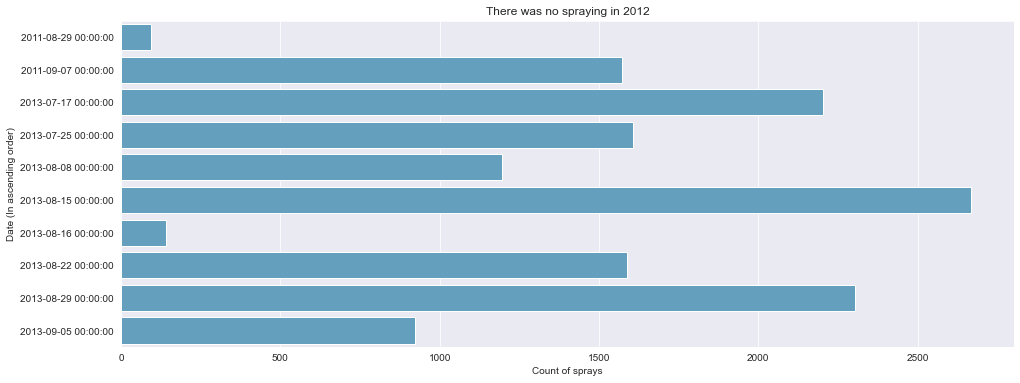

In [13]:
# Charting our time-series
plt.figure(figsize=(16, 6))
sns.barplot(y=spray_ts.index, x=spray_ts.values, color=sns.color_palette('icefire')[0])
plt.title("There was no spraying in 2012")
plt.xlabel("Count of sprays")
plt.ylabel("Date (In ascending order)")
plt.show()

In [14]:
# Filtering some outliers (We've realised this after plotting)
spray[['latitude', 'longitude']].describe()

latitude     longitude
count  14294.000000  14294.000000
mean      41.901739    -87.734512
std        0.105100      0.067599
min       41.713925    -88.096468
25%       41.782669    -87.789607
50%       41.937578    -87.724781
75%       41.977217    -87.692107
max       42.395983    -87.586727

In [15]:
# Removing sprays that occured outside of the parameters provided in the map
spray_filtered = spray.loc[spray['latitude'] < 42.1]

In [16]:
# Let's plot where sprays have been in the past
mapdata_txt = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata_txt.shape[0] * 1.0 / mapdata_txt.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

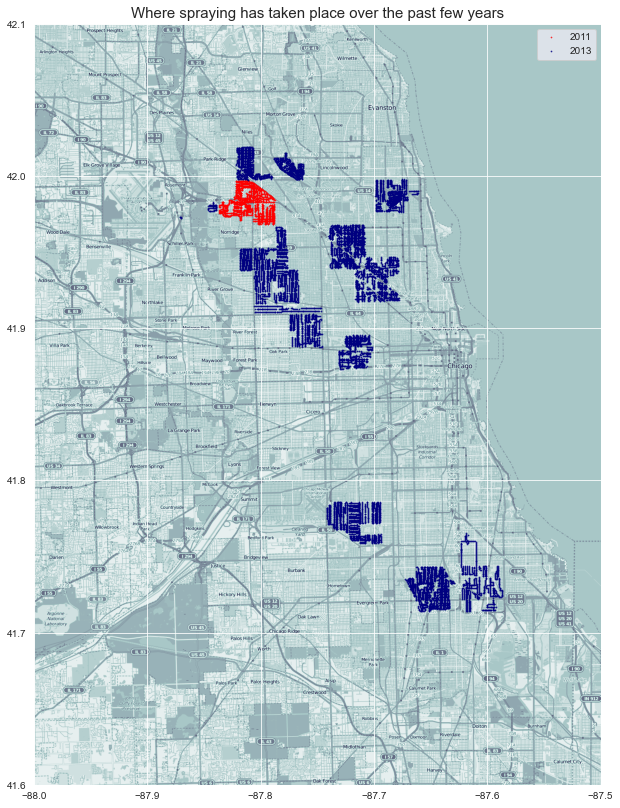

In [17]:
plt.figure(figsize=(14,14))
plt.imshow(mapdata_txt, cmap=plt.get_cmap('bone'), extent=lon_lat_box, aspect=aspect)

spray_filtered["year"] = spray_filtered["date"].dt.year
spray_2011 = spray_filtered.loc[spray_filtered["year"]==2011]
spray_2013 = spray_filtered.loc[spray_filtered["year"]==2013]
spray_filtered.drop(["year"], axis=1, inplace=True)

spray_2011_chart = plt.scatter(spray_2011['longitude'], spray_2011['latitude'], 
                               c="red", marker='x', s=0.5, alpha=0.8, label ="2011")

spray_2013_chart = plt.scatter(spray_2013['longitude'], spray_2013['latitude'], 
                               c="navy", marker='o', s=0.5, alpha=0.8, label="2013")

plt.title("Where spraying has taken place over the past few years", fontsize=15)
plt.legend()
plt.show();

**Thoughts**: Spraying should theoretically have an effect on mosquito populations (i.e. Higher spraying rates should correspond to lower mosquito populations). We will need to reflect that in our ```train``` / ```test``` datasets

In [18]:
# Saving our spray dataset for use later
spray.to_csv('../data/spray_tidied.csv', index=False)

### Tidying our ```weather``` dataset
The weather records provided to us are from May 2007 to October 2014. There are two weather stations capturing the data each day (XX and XX). 

In this part of the codebook, we will focus on optimising and selecting variables that have a large part to play in aiding mosquito reproduction. Based on our research, varying temperatures have significant effects on eggs viability and hatching time, with optimal temperatures depending on species. 

**Optimal temperatures for WNV transmission**

West Nile virus spreads most efficiently in the U.S. at temperatures between 75.2 and 77 degrees Fahrenheit, a new study published in eLife shows.

**What type of mosquitos transmit the WNV?**

The primary carrier of West Nile virus is the southern house mosquito. This mosquito species breeds in polluted water commonly found in roadside ditches that receive effluent from residential filter beds and septic tanks. There are approximately 300 miles of roadside septic ditches in St. Tammany Parish. Other species that have the potential for transmitting the virus are *Culex salinarius* and *Culex nigripalpus* which both breed in fresh and brackish water commonly found in the marshes and permanent water pools. *Aedes vexans*, the inland floodwater mosquito, which breeds in temporary pools, also is capable of transmitting WNV. Finally, circumstantial evidence suggests that the Asian tiger mosquito, which breeds in artificial containers commonly found in yards, will also transmit the disease.

**Resources**:
* The role of temperature in shaping mosquito-borne viruses transmission [(link)](https://www.frontiersin.org/articles/10.3389/fmicb.2020.584846/full)
* Mosquitos and West Nile Virus: What should you know and what can you do [(link)](https://stpmad.org/wp-content/uploads/2018/10/West_Nile_virus_pamphlet.pdf)
* Rising temperatures could shift US WNV transmission [(link)](https://www.nsf.gov/discoveries/disc_summ.jsp?cntn_id=301296&org=NSF&from=news#:~:text=West%20Nile%20virus%20spreads%20most,study%20published%20in%20eLife%20shows.)

In [58]:
# Import our weather dataset
weather = pd.read_csv('../data/weather.csv', parse_dates=['Date'])

# Converting our column names to lower-case for standardisation
weather.columns = weather.columns.str.lower()

In [59]:
# Taking a quick look at our weather dataset 
eda_clean(weather)

Dataset Statistics:

Shape of dataframe: (2944, 22)
--------------------------------------
Null values in dataframe: 0
--------------------------------------
% of Null values in dataframe: 0.0%
--------------------------------------
Total duplicate rows: 0
--------------------------------------
% duplicate rows: 0.0%

Variable Types
Columns Count: 
object            15
int64              5
float64            1
datetime64[ns]     1
dtype: int64


In [60]:
# Previewing datatypes (We prefer to use .info)
weather.info()

# We will need to convert a number of columns to int64 formats as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   object        
 5   depart       2944 non-null   object        
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   object        
 8   heat         2944 non-null   object        
 9   cool         2944 non-null   object        
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        2944 non-null   object        
 14  water1       2944 non-null   object        
 15  snowfall     2944 non-null   object        
 16  precip

**Replacing 'M' values in the dataset**

This is fairly cumbersome as missing / null values are recorded 'M'. This means traditional data-cleaning techniques will not apply here.

In [61]:
# Counting our missing values
weather[weather=='M'].count()

station           0
date              0
tmax              0
tmin              0
tavg             11
depart         1472
dewpoint          0
wetbulb           4
heat             11
cool             11
sunrise           0
sunset            0
codesum           0
depth          1472
water1         2944
snowfall       1472
preciptotal       2
stnpressure       4
sealevel          9
resultspeed       0
resultdir         0
avgspeed          3
dtype: int64

In [62]:
# Replacing all missing values with np.nan
weather[weather=='M'] = np.nan

**Trimming our dataset - Selecting columns of interest**

In [63]:
# See our reasonning above
cols_to_drop = ['depart', 'wetbulb', 'heat', 'cool', 'depth', 
                'water1', 'snowfall', 'resultspeed', 'resultdir']

In [64]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2933 non-null   object        
 5   depart       1472 non-null   object        
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2940 non-null   object        
 8   heat         2933 non-null   object        
 9   cool         2933 non-null   object        
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        1472 non-null   object        
 14  water1       0 non-null      object        
 15  snowfall     1472 non-null   object        
 16  precip

In [65]:
# Dropping unnecessary columns
weather.drop(columns=cols_to_drop, inplace=True)

**One-hot encoding ```codesum``` values**

In [66]:
weather['codesum'].unique()
# There's way too many unique values

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [67]:
# Ensuring there is proper spacing between different weather types
weather_codes = ['+FC','FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL','IC', 'FG+', 'FG', 
                 'BR', 'UP', 'HZ', 'FU', 'VA', 'DU', 'DS', 'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 
                 'SH', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC']

weather['codesum'] = weather['codesum'].apply(lambda x: ' '.join([i for i in x.split(' ') if i in weather_codes]))

**We will need to create separate dummy variables for different conditions**

These include ```raining```,  ```snowing```,  ```windy```,  ```misty``` conditions

In [68]:
# Manual creation of dummy variables which rainy, snowy, windy and misty conditions 
weather["raining"] = np.where(weather['codesum'].str.contains("|".join(['TS', 'RA', 'DZ', 'SH'])), 1, 0)
weather["snowing"] = np.where(weather['codesum'].str.contains("|".join(['SN', 'SG', 'GS', 'PL', 'IC', 'DR', 'BC', 'GR'])), 1, 0)
weather["windy"] = np.where(weather['codesum'].str.contains("|".join(['SQ', 'DS', 'SS', 'PO', 'BL'])), 1, 0)
weather["misty"] = np.where(weather['codesum'].str.contains("|".join(['BR', 'HZ', 'FG', 'FU'])), 1, 0)

On hindsight, a large part of significant weather conditions is rain, which may be captured in total precipitation.

**Tidying / Fixing missing ```tavg``` values**

In [69]:
## We can manually inpute missing tavg values
weather['tavg'][weather['tavg'].isna()] = 0.5*(weather['tmax'][weather['tavg'].isna()] + weather['tmin'][weather['tavg'].isna()])

**Tidying / Fixing missing ```preciptotal``` values**

In [70]:
# We can manually inpute missing preciptotal
weather.loc[weather['preciptotal'].isna()]

station       date  tmax  tmin tavg  dewpoint sunrise sunset codesum  \
117        2 2007-06-28    73    61   67        56       -      -           
119        2 2007-06-29    71    56   64        56       -      -           

    preciptotal stnpressure sealevel avgspeed  raining  snowing  windy  misty  
117         NaN       29.43    30.07     13.3        0        0      0      0  
119         NaN       29.47    30.11      8.2        0        0      0      0

In [71]:
# Let's see how they stack up to their neighbours
weather.iloc[115:120,:]

station       date  tmax  tmin tavg  dewpoint sunrise sunset codesum  \
115        2 2007-06-27    89    71   80        69       -      -   RA BR   
116        1 2007-06-28    74    58   66        55    0419   1931           
117        2 2007-06-28    73    61   67        56       -      -           
118        1 2007-06-29    70    56   63        55    0419   1931           
119        2 2007-06-29    71    56   64        56       -      -           

    preciptotal stnpressure sealevel avgspeed  raining  snowing  windy  misty  
115        0.35       29.36    30.00      8.5        1        0      0      1  
116        0.00       29.41    30.09     12.5        0        0      0      0  
117         NaN       29.43    30.07     13.3        0        0      0      0  
118        0.00       29.41    30.13      8.3        0        0      0      0  
119         NaN       29.47    30.11      8.2        0        0      0      0

Based on the dataframe above, we can logically deduce that total precipitation will be a function of the weather type. Since we only have two missing values, we can logically impute them as 0 as there no significant weather types recorded on those days.

In [72]:
# We can safely assume that if the codesum does not indicate a significant weather type, we can assume preciptotal = 0
weather['preciptotal'] = [0 if i is np.nan else i for i in weather['preciptotal']]

**Tidying / Fixing ```preciptotal``` values that are recorded as 'T' (Trace amounts)**

In [73]:
# We can manually inpute missing preciptotal
weather.loc[weather['preciptotal'] == ("  T" or "T")]

station       date  tmax  tmin tavg  dewpoint sunrise sunset codesum  \
6           1 2007-05-04    66    49   58        41    0444   1852      RA   
8           1 2007-05-05    66    53   60        38    0443   1853           
9           2 2007-05-05    66    54   60        39       -      -           
12          1 2007-05-07    83    47   65        41    0441   1856      RA   
15          2 2007-05-08    80    60   70        57       -      -      HZ   
...       ...        ...   ...   ...  ...       ...     ...    ...     ...   
2913        2 2014-10-16    58    53   56        52       -      -   DZ BR   
2914        1 2014-10-17    62    48   55        46    0606   1707           
2927        2 2014-10-23    62    41   52        41       -      -      BR   
2936        1 2014-10-28    68    45   57        38    0619   1651           
2941        2 2014-10-30    53    37   45        35       -      -      RA   

     preciptotal stnpressure sealevel avgspeed  raining  snowing  windy  misty  
6              T       29.31    30.05     10.8        1        0      0      0  
8              T       29.40    30.10     12.0        0        0      0      0  
9              T       29.46    30.09     11.5        0        0      0      0  
12             T       29.38    30.12     10.5        1        0      0      0  
15             T       29.36    30.02      5.4        0        0      0      1  
...          ...         ...      ...      ...      ...      ...    ...    ...  
2913           T       29.09    29.77      8.4        1        0      0      1  
2914           T       28.99    29.69     13.2        0        0      0      0  
2927           T       29.46    30.16      8.4        0        0      0      1  
2936           T       29.15    29.85     15.6        0        0      0      0  
2941           T       29.41    30.10      6.5        1        0      0      0  

[318 rows x 17 columns]

In [74]:
# We can safely assume that if the codesum does not indicate a significant weather type, we can assume preciptotal = 0
weather['preciptotal'] = [0 if i in ["T", "  T"] else i for i in weather['preciptotal']]

In [75]:
# imputed_precip_total = {}
# for i in weather['codesum'].unique():
#     imputed_precip_total[i] = weather[weather['codesum'] == i]['preciptotal'].median()

In [76]:
# # We can imput the precipitation total by using the median values from different weather conditions
# weather['preciptotal'][weather['preciptotal'].isnull()] = weather['codesum'][weather['preciptotal'].isnull()].map(imputed_precip_total)

In [77]:
weather['preciptotal'][weather['preciptotal'].isna()] = 0

**Tidying / Fixing missing ```stnpressure``` values**

In [78]:
## Let's tidy lot_frontage using the median corresponding to the dataset
imputed_stnpressure = {}
for i in weather['station'].unique():
    imputed_stnpressure[i] = weather[weather['station'] == i]['stnpressure'].median()

In [79]:
# We can imput the precipitation total by using the median values from different weather conditions
weather['stnpressure'][weather['stnpressure'].isna()] = weather['station'][weather['stnpressure'].isna()].map(imputed_stnpressure)

**Tidying / Fixing missing ```sealevel``` values**

In [80]:
imputed_sealevel = {}
for i in weather['station'].unique():
    imputed_sealevel[i] = weather[weather['station'] == i]['sealevel'].median()

In [81]:
# We can imput the precipitation total by using the median values from different weather conditions
weather['sealevel'][weather['sealevel'].isna()] = weather['station'][weather['sealevel'].isna()].map(imputed_stnpressure)

**Tidying / Fixing missing ```avgspeed``` values**

In [82]:
## Let's tidy lot_frontage using the median corresponding to the dataset
imputed_avgspeed = {}
for i in weather['codesum'].unique():
    imputed_avgspeed[i] = weather[weather['codesum'] == i]['avgspeed'].median()

In [83]:
# We can imput the precipitation total by using the median values from different weather conditions
weather['avgspeed'][weather['avgspeed'].isna()] = weather['codesum'][weather['avgspeed'].isna()].map(imputed_avgspeed)

**Ensuring datatypes are representative**

In [84]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   object        
 5   dewpoint     2944 non-null   int64         
 6   sunrise      2944 non-null   object        
 7   sunset       2944 non-null   object        
 8   codesum      2944 non-null   object        
 9   preciptotal  2944 non-null   object        
 10  stnpressure  2944 non-null   object        
 11  sealevel     2944 non-null   object        
 12  avgspeed     2944 non-null   object        
 13  raining      2944 non-null   int32         
 14  snowing      2944 non-null   int32         
 15  windy        2944 non-null   int32         
 16  misty 

In [85]:
weather[['tavg', 'preciptotal', 'stnpressure', 
         'sealevel', 'avgspeed']] = weather[['tavg', 'preciptotal', 
                                             'stnpressure', 'sealevel', 'avgspeed']].astype(float)

In [86]:
# Dropping our codesum column now that we have our one-hot encoded-variables
weather.drop(columns='codesum', inplace=True)

**More feature engineering**

Additional features to consider include: humidity, the interaction between temperature vs. total precipitation, lagging weather measurements, temprature range, etc

Reference formula above <>

In [87]:
# Feature Engineering #1: Relative humdity
weather['humidity'] = 100*(np.exp((17.67 * ((weather['dewpoint'] - 32) * (5/9))) / 
                                           (243.5 + ((weather['dewpoint'] - 32) * (5/9)))) 
                                    /
                                    np.exp((17.67 * ((weather['tavg'] - 32) * (5/9))) /
                                           (243.5 + ((weather['tavg'] - 32) * (5/9)))))

In [88]:
# Feature engineering #2: Temperature range
weather['trange'] = weather['tmax'] - weather['tmin']

In [89]:
# Feature engineering #3: Daylight hours
station1 = weather.loc[weather['station']==1] # Only station 1 records sunset / sunrise hours

# Converting to the right format
station1['sunset'] = station1['sunset'].map(lambda x : (str(int(x[0:2]) + 1) + '00') if x[2:4] == '60' else x)
station1['sunrise'] = station1['sunrise'].map(lambda x : (str(int(x[0:2]) + 1) + '00') if x[2:4] == '60' else x)

In [90]:
# # Calculating daylight time in minutes
# station1['sunset_t'] = station1['sunset'].map(lambda x : dt.datetime.strptime(x, '%H%M'))
# station1['sunrise_t'] = station1['sunrise'].map(lambda x : dt.datetime.strptime(x, '%H%M'))
# station1['daylight_mins'] = (station1['sunset_t'] - station1['sunrise_t']).map(lambda x : x.seconds / 60)

In [91]:
# # Merging back with the actual dataset
# weather = weather.merge(station1[['date', 'daylight_mins']], on="date")

In [92]:
# We can drop these columns
weather.drop(columns=['windy', 'snowing', 'sunrise', 'sunset'], inplace=True)

In [94]:
cols_to_average = ['tmax', 'tmin', 'tavg', 'trange', 'dewpoint', 
                   'stnpressure', 'sealevel', 'avgspeed', 'humidity', 'preciptotal']

station_1 = weather.loc[weather['station']==1].set_index('date')
station_2 = weather.loc[weather['station']==2].set_index('date')

station_1roll = station_1[cols_to_average].rolling(10).mean()
station_1roll['station'] = 1
station_2roll = station_2[cols_to_average].rolling(10).mean()
station_2roll['station'] = 2

stations_mean = pd.concat([station_1roll, station_2roll], axis=0)
stations_mean

cols_to_sum = ['preciptotal', 'raining', 'misty']

station_1rolls = station_1[cols_to_sum].rolling(10).sum()
station_1rolls['station'] = 1
station_2rolls = station_2[cols_to_sum].rolling(10).sum()
station_2rolls['station'] = 2

stations_sum = pd.concat([station_1rolls, station_2rolls], axis=0)
stations_sum

weather = weather.merge(stations_mean, on=['date', 'station'], how='left', suffixes=["", "_rollmean10"])
weather = weather.merge(stations_sum, on=['date', 'station'], how='left', suffixes=["", "_rollsum10"])

In [95]:
# Previewing our final dataframe
weather.tail()

station       date  tmax  tmin  tavg  dewpoint  preciptotal  \
2939        2 2014-10-29    49    40  45.0        34         0.00   
2940        1 2014-10-30    51    32  42.0        34         0.00   
2941        2 2014-10-30    53    37  45.0        35         0.00   
2942        1 2014-10-31    47    33  40.0        25         0.03   
2943        2 2014-10-31    49    34  42.0        29         0.04   

      stnpressure  sealevel  avgspeed  ...  trange_rollmean10  \
2939        29.42     30.07       9.0  ...               16.6   
2940        29.34     30.09       5.5  ...               19.3   
2941        29.41     30.10       6.5  ...               16.6   
2942        29.49     30.20      22.9  ...               19.9   
2943        29.54     30.20      22.6  ...               17.6   

      dewpoint_rollmean10  stnpressure_rollmean10  sealevel_rollmean10  \
2939                 41.4                  29.333               29.997   
2940                 39.0                  29.285               30.015   
2941                 40.3                  29.351               30.017   
2942                 37.6                  29.288               30.019   
2943                 39.1                  29.354               30.022   

      avgspeed_rollmean10  humidity_rollmean10  preciptotal_rollmean10  \
2939                 9.30            58.427970                   0.005   
2940                 9.04            61.510281                   0.000   
2941                 9.04            58.782217                   0.005   
2942                10.19            60.154118                   0.003   
2943                10.14            58.152055                   0.009   

      preciptotal_rollsum10  raining_rollsum10  misty_rollsum10  
2939           5.000000e-02                2.0              2.0  
2940          -1.110223e-16                0.0              2.0  
2941           5.000000e-02                3.0              2.0  
2942           3.000000e-02                1.0              2.0  
2943           9.000000e-02                4.0              3.0  

[5 rows x 27 columns]

In [96]:
# Save our tidied dataframe
weather.to_csv('../data/weather_tidied.csv', index=False)

In [57]:
# ------ END -----